<a href="https://colab.research.google.com/github/kavyakkk/UCDPA_Kavyashree/blob/main/Kavyashree_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022/code

https://www.kaggle.com/code/shrayanmandal/salary-predictor-v1 https://www.kaggle.com/code/eslamfouad/software-industry-salary-full-eda

https://www.kaggle.com/code/makxxxs/salary-pred https://www.kaggle.com/code/iamsouravbanerjee/data-science-salary-analysis-dive-deep/notebook

In [ ]:
df = pd.read_csv("/Salary_Dataset_with_Extra_Features.csv")

In [ ]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [ ]:
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 22770, Columns: 8


In [ ]:
print(df.columns)

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [ ]:
print("Mean Salary:", round(df["Salary"].mean()))
print("Median Salary:", round(df["Salary"].median()))
print("Highest Salary:", round(df["Salary"].max()))
print("Lowest Salary:", round(df["Salary"].min()))

Mean Salary: 695387
Median Salary: 500000
Highest Salary: 90000000
Lowest Salary: 2112


In [ ]:
# Handle missing values if any
#data = df.dropna()
df.isna().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [ ]:
df['Company Name'].value_counts().head(10)

Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
Wipro                             122
IBM                               122
HCL Technologies                  102
Capgemini                         101
Fresher                           101
Name: Company Name, dtype: int64

In [ ]:
df['Employment Status'].value_counts()

Full Time     20083
Intern         2106
Contractor      548
Trainee          33
Name: Employment Status, dtype: int64

In [ ]:
df["Company Name"].nunique()

11261

In [ ]:
df['Location'].value_counts()

Bangalore         8264
Hyderabad         4467
New Delhi         4176
Chennai           2458
Pune              2134
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Kerala             108
Jaipur              81
Name: Location, dtype: int64

In [ ]:
df['Job Roles'].value_counts()

SDE         8183
Android     2945
Frontend    2163
Java        1858
Testing     1740
IOS         1631
Backend     1194
Web          999
Python       947
Database     865
Mobile       245
Name: Job Roles, dtype: int64

In [ ]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [ ]:
job_roles = df['Job Roles'].value_counts()
fig = px.bar(y=job_roles.values,
             x=job_roles.index,
             color = job_roles.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=job_roles.values,
             title= 'Job roles distribution',
             template= 'plotly',
             width=750, height=500)
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
# Show the chart
fig.show()


In [ ]:
top_20_job_title = df["Job Title"].value_counts()[:20]
top_20_job_title

Software Development Engineer                   2351
Android Developer                               2029
Software Development Engineer (SDE)             1614
Front End Developer                             1412
Test Engineer                                   1314
Web Developer                                    853
Software Development Engineer - Intern           771
Software Development Engineer In Test (SDET)     766
Backend Developer                                534
Python Developer                                 485
IOS Developer                                    484
Java Developer                                   387
Senior IOS Developer                             351
Senior Software Development Engineer             350
Junior Java Developer                            330
Senior Java Developer                            318
Software Development Engineer I                  312
Software Development Engineer (SDE) - Intern     297
Senior Android Developer                      

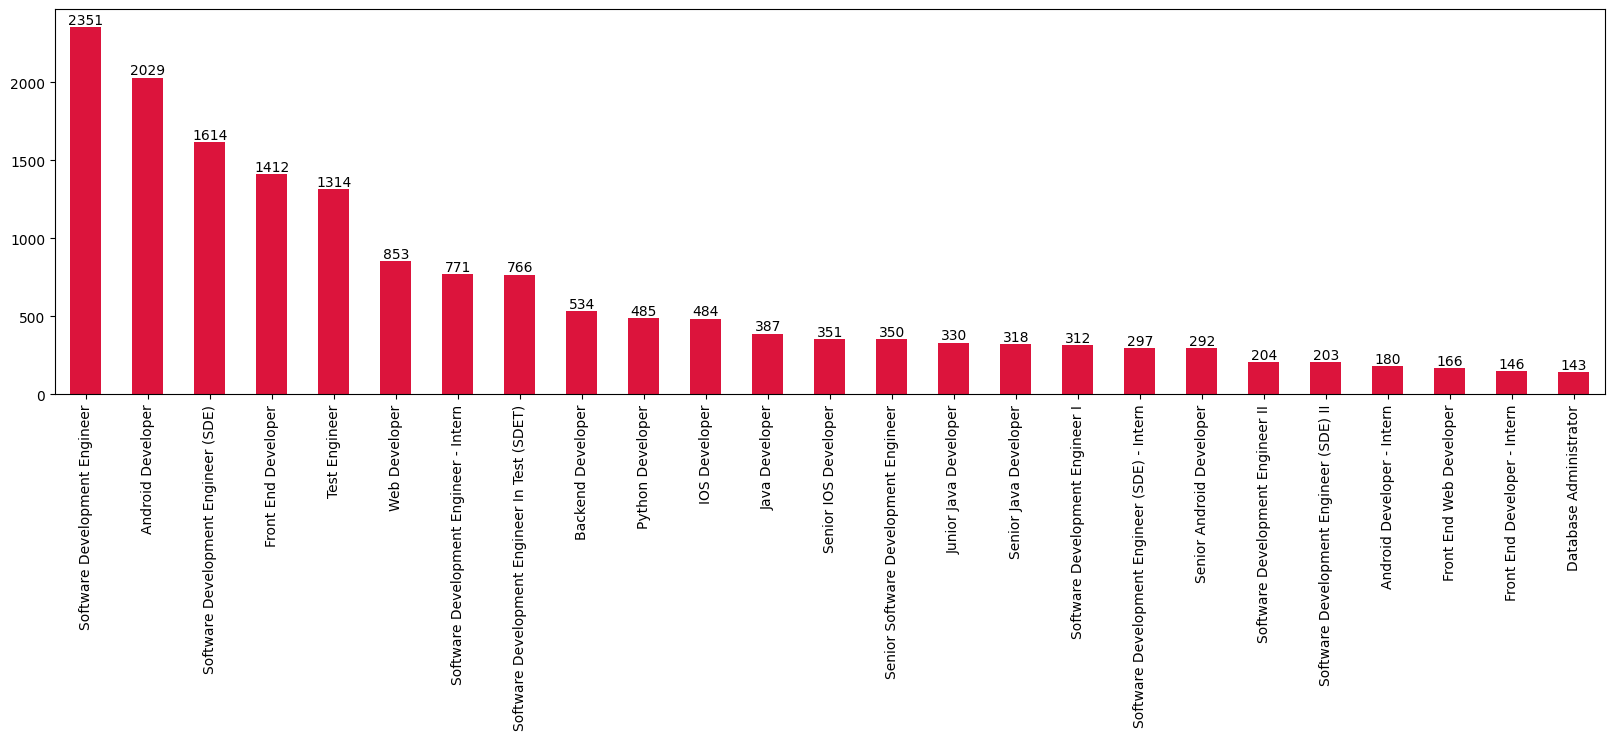

In [ ]:
#Barplot for number of different Job titles(count)
plt.figure(figsize = (20, 5))
ax = df["Job Title"].value_counts()[:25].plot(kind = 'bar',
                                              color = "crimson")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

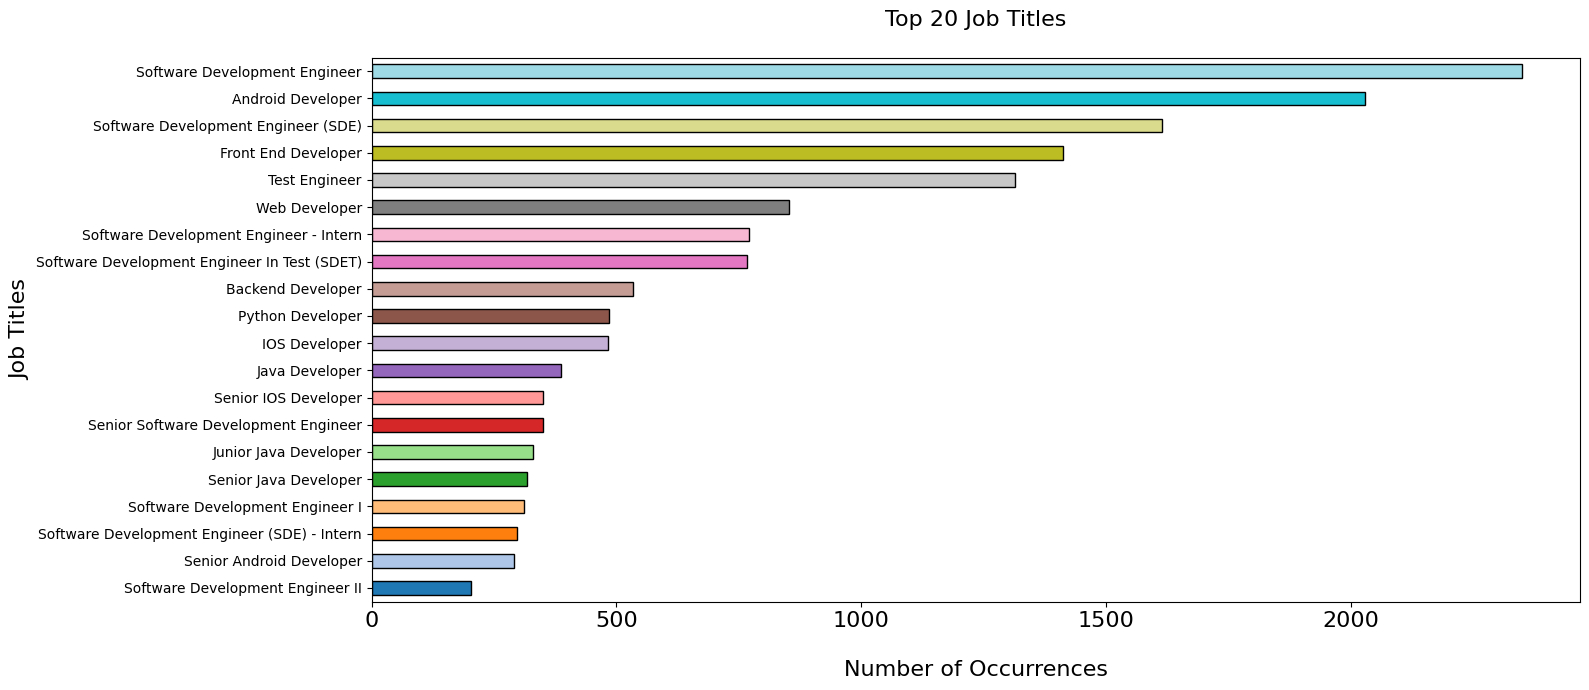

In [ ]:
plt.figure(figsize = (16, 7))
top_20_job_title.sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Job Titles', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Top 20 Job Titles\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()


In [ ]:
# Creating a histogram with job roles and employment statsus
fig = px.histogram(df, x = "Job Roles", color = "Employment Status", title = "<b> Count of Employment Status on Every Job Roles.",
                  color_discrete_sequence = px.colors.qualitative.Vivid,
                  width = 750, height = 500)

# Setting the layout
fig.update_layout(template = "plotly")
fig.update_layout(title_font_size = 20)

fig.show()



In [ ]:
top_10_countries_highest_median_salary = df.groupby('Location')['Salary'].median().nlargest(10)
print("Top 10 countries with the highest median salary:")
top_10_countries_highest_median_salary = top_10_countries_highest_median_salary.sort_values(ascending = True)
top_10_countries_highest_median_salary

Top 10 countries with the highest median salary:


Location
Chennai           400000.0
Bangalore         500000.0
Hyderabad         500000.0
Jaipur            500000.0
Kerala            500000.0
Kolkata           500000.0
Madhya Pradesh    500000.0
New Delhi         500000.0
Pune              500000.0
Mumbai            708000.0
Name: Salary, dtype: float64

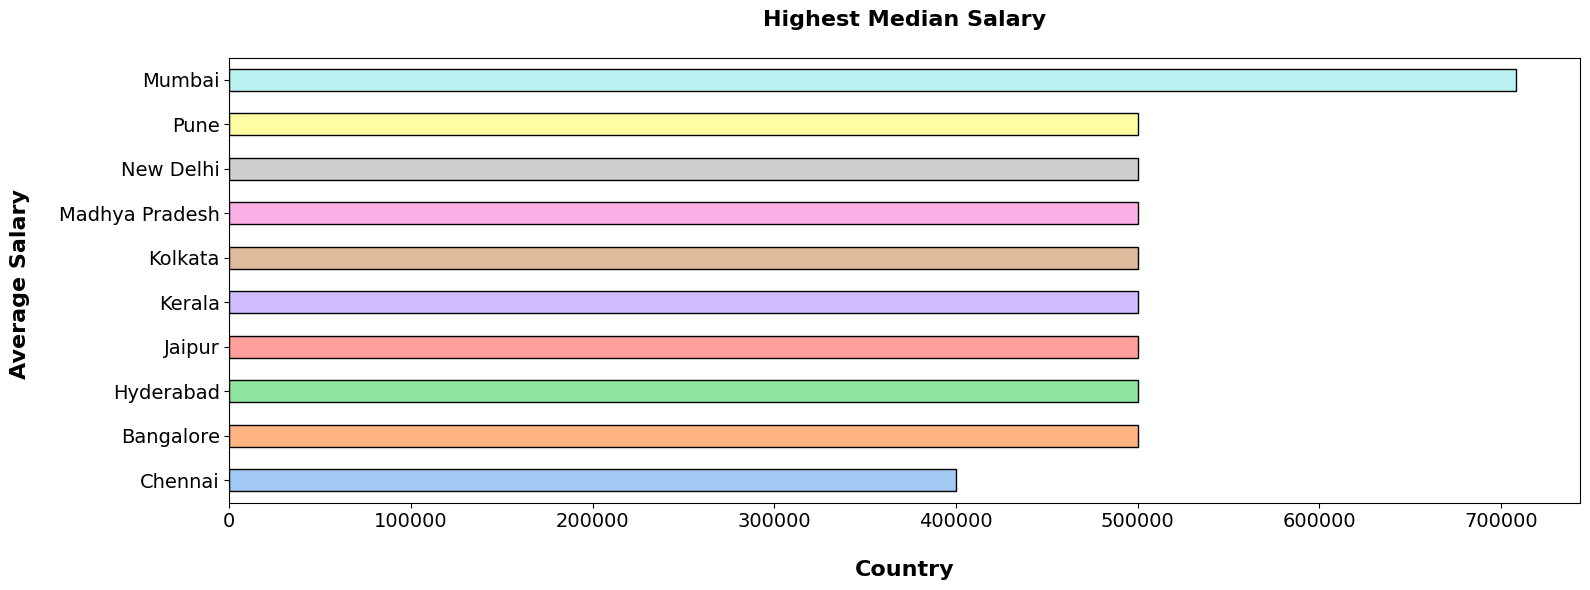

In [ ]:
plt.figure(figsize = (16, 6))
top_10_countries_highest_median_salary.plot(kind = 'barh', color = sns.color_palette('pastel'), edgecolor = 'black', fontsize = 14)
plt.xlabel('\nCountry', fontsize = 16, weight = 'bold')
plt.ylabel('Average Salary \n', fontsize = 16, weight = 'bold')
plt.title('Highest Median Salary\n', fontsize = 16, weight = 'bold')
plt.xticks(rotation = 0, ha = 'center', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
job_roles = df['Location'].value_counts()
fig = px.bar(y=job_roles.values,
             x=job_roles.index,
             color = job_roles.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=job_roles.values,
             title= 'location',
             template= 'plotly',
             width=750, height=500)
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
# Show the chart
fig.show()

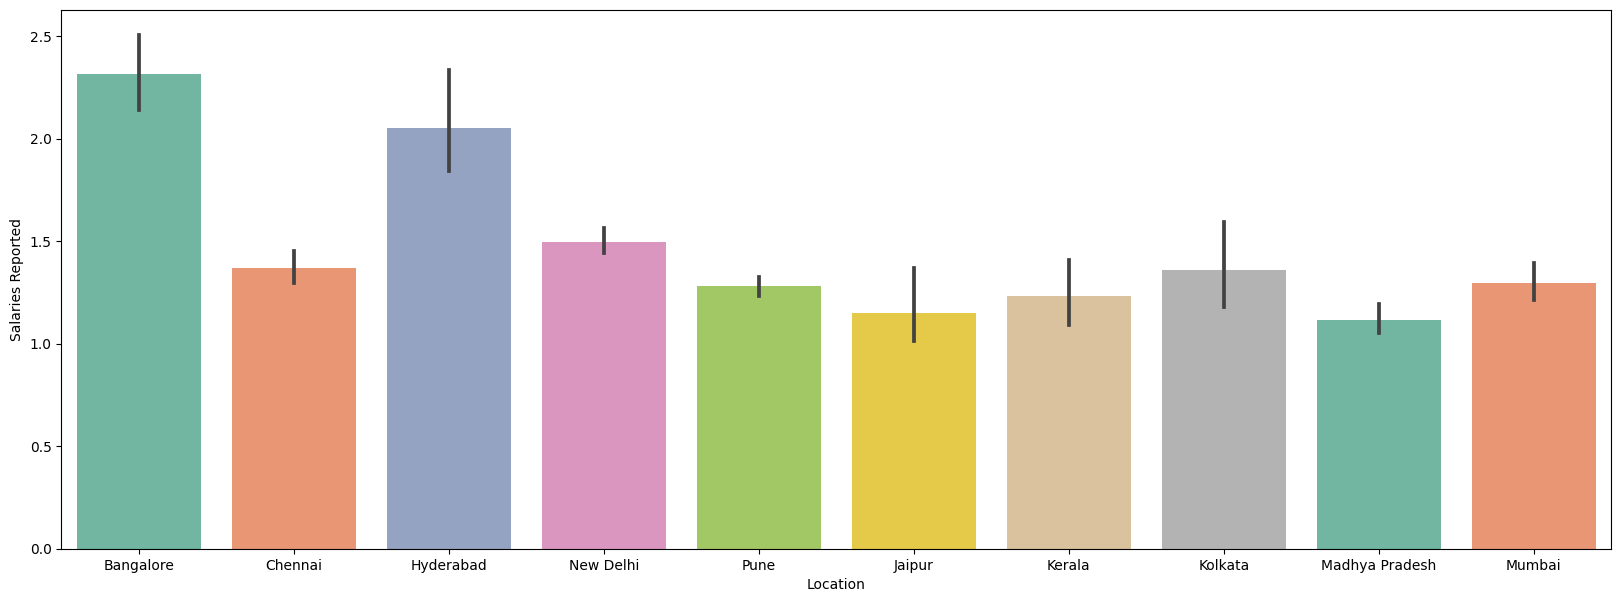

In [ ]:
#Barplot for locatiob VS salaries Reported
plt.figure(figsize = (20, 7))
sns.barplot(x = df["Location"], y = df["Salaries Reported"], palette = "Set2");


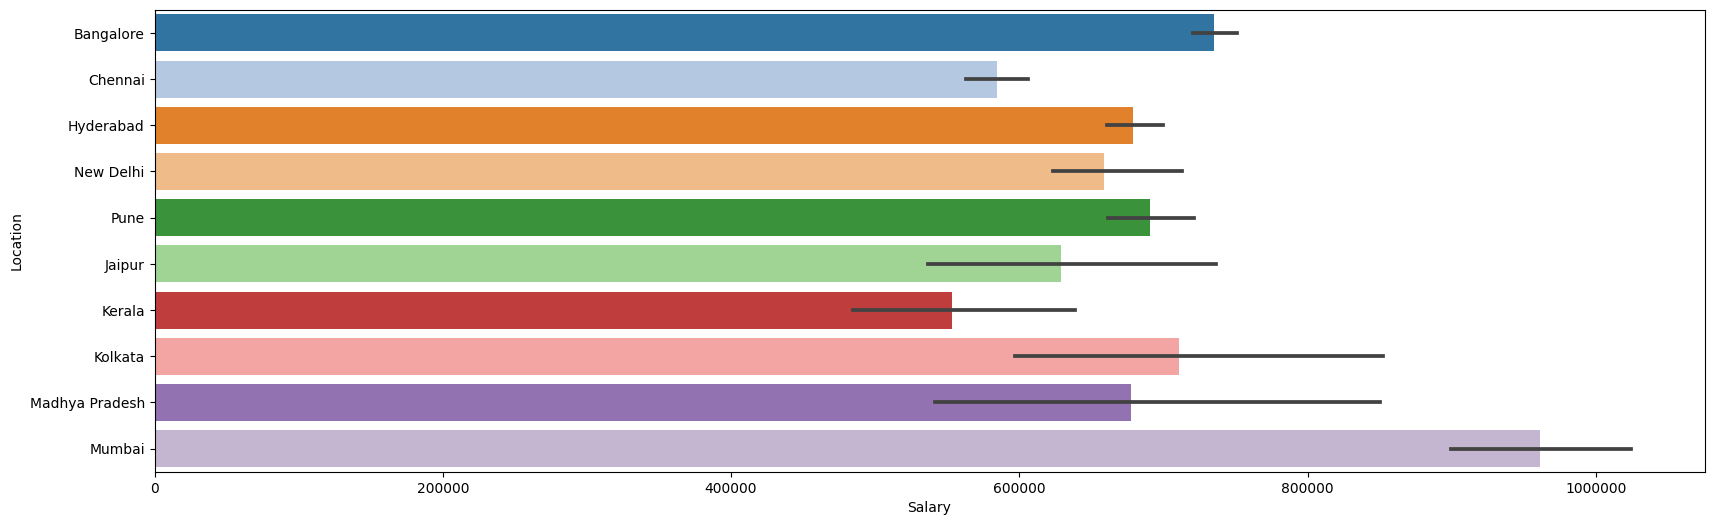

In [ ]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = df["Salary"], y = df["Location"], palette = "tab20");

In [ ]:
df2=df.sort_values(['Salaries Reported'],ascending=False)

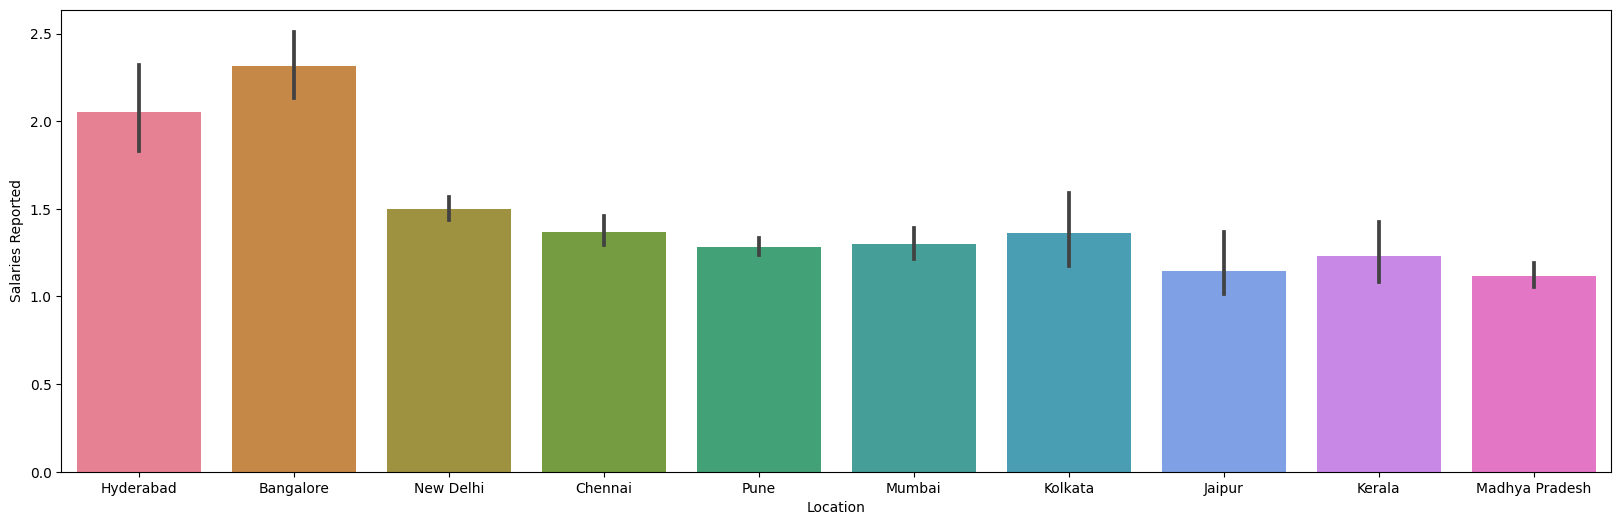

In [ ]:
plt.figure(figsize = (20, 6))
sns.barplot(x = df2["Location"], y = df2["Salaries Reported"], palette ='husl');

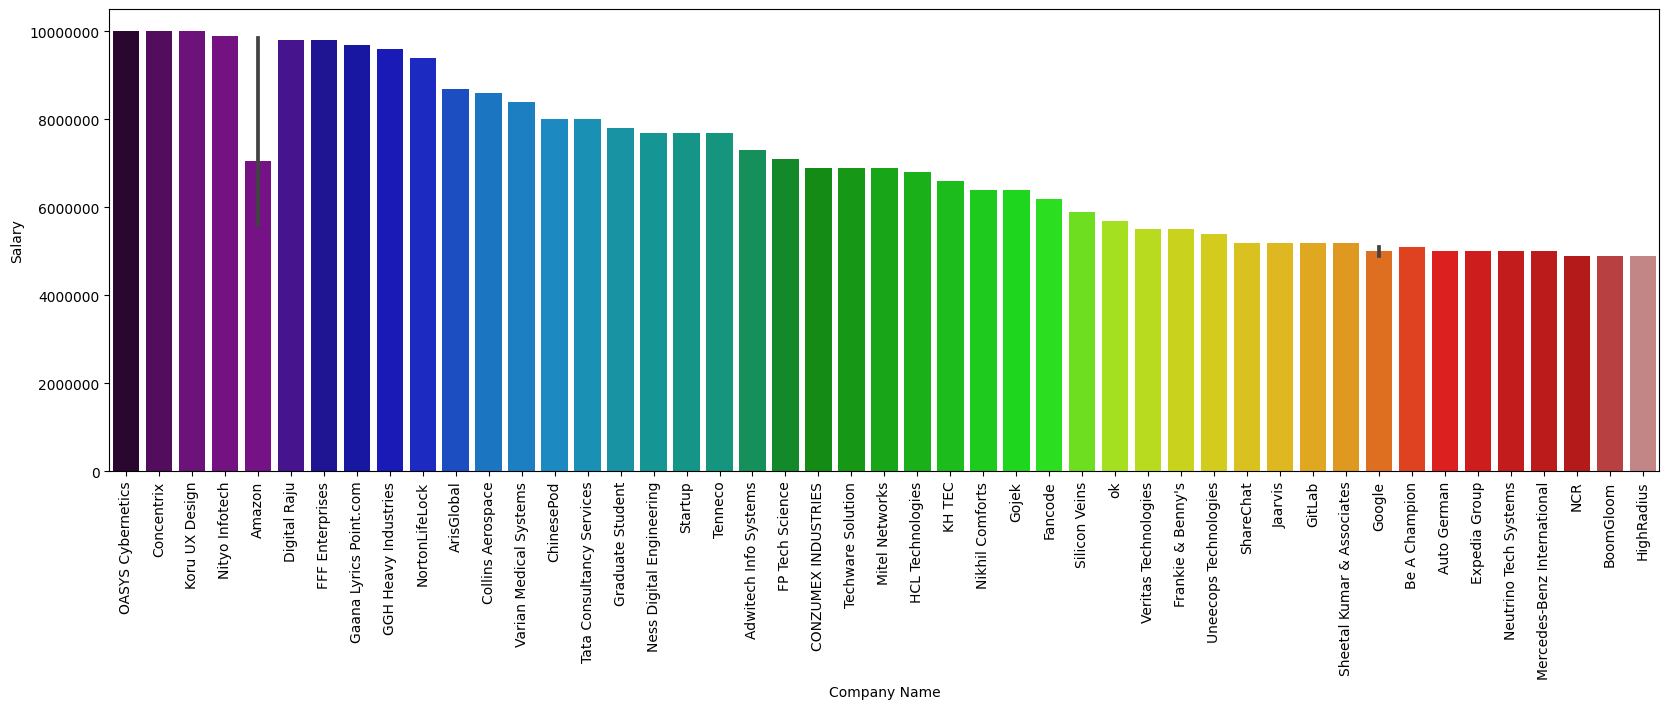

In [ ]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Company Name"][1:51],
            y = df["Salary"][1:51],
            palette = "nipy_spectral");

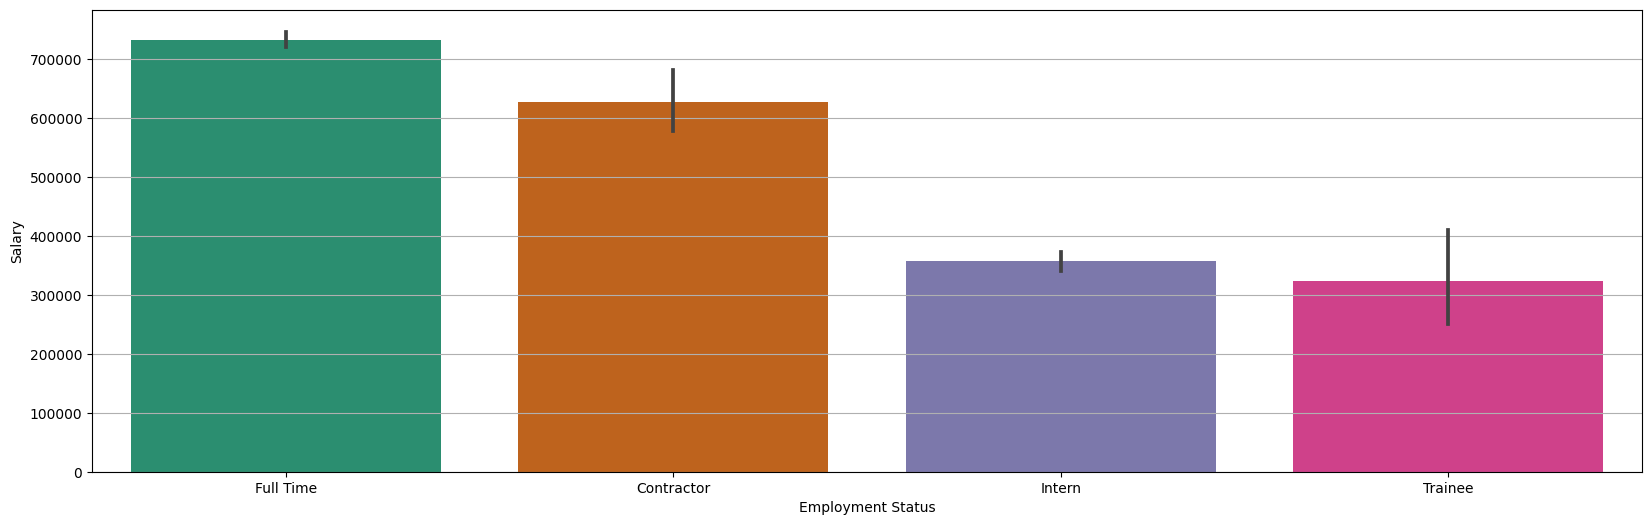

In [ ]:
#Bar plot for employment status VS salary
plt.figure(figsize = (20, 6))
plt.grid()
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Employment Status"], y = df["Salary"], palette = "Dark2");

In [ ]:
#Bar plot on job roles
job_roles = df.groupby(['Job Roles'])['Job Roles'].count().sort_values(ascending=False)

palette = ["#2F6BAE", "#19649C", "#006B89", "#00726C", "#F5A752", "#F36318", "#DD2B00", "#A50025", "#7F2B82", "#4D4D4D", "#B3B3B3"]

# Create the bar plot
fig = go.Figure([go.Bar(x=job_roles.index, y=job_roles.values, marker_color=palette)])

# Set the title of the plot and style
fig.update_layout(title="Job role Distribution", title_font=dict(size=20, family='Arial', color='black'),
                  xaxis=dict(title='Job role', title_font=dict(size=16, family='Arial', color='black'),
                             tickfont=dict(size=12, family='Arial', color='black')),
                  yaxis=dict(title='Count', title_font=dict(size=16, family='Arial', color='black'),
                             tickfont=dict(size=12, family='Arial', color='black')),
                  plot_bgcolor='white', showlegend=False)

# Show the plot
fig.show()

In [ ]:

# Define a custom color palette
companies = df.groupby(['Company Name'])['Company Name'].count().sort_values(ascending=False).head(30)

palette = ["#F5A752", "#2F6BAE", "#DD2B00", "#A50025", "#4D4D4D", "#006B89", "#B3B3B3", "#7F2B82", "#DD2B00",
           "#F36318", "#19649C", "#00726C", "#F5A752", "#19649C", "#2F6BAE", "#DD2B00", "#00726C", "#006B89",
           "#4D4D4D", "#B3B3B3", "#F36318", "#A50025", "#7F2B82", "#F5A752", "#2F6BAE", "#DD2B00", "#19649C",
           "#00726C", "#006B89", "#B3B3B3", "#4D4D4D", "#F36318", "#A50025", "#7F2B82", "#F5A752", "#2F6BAE",
           "#19649C", "#DD2B00", "#00726C", "#006B89", "#4D4D4D", "#B3B3B3", "#7F2B82", "#F36318", "#A50025",
           "#F5A752", "#2F6BAE", "#DD2B00", "#19649C", "#00726C"]

# Create the bar plot
fig = go.Figure([go.Bar(x=companies.index, y=companies.values, marker_color=palette)])

# Set the title of the plot and style
fig.update_layout(title="Companies Distribution", title_font=dict(size=20, family='Arial', color='black'),
                  xaxis=dict(title='Companies', title_font=dict(size=16, family='Arial', color='black'),
                             tickfont=dict(size=12, family='Arial', color='black'), tickangle=90),
                  yaxis=dict(title='Count', title_font=dict(size=16, family='Arial', color='black'),
                             tickfont=dict(size=12, family='Arial', color='black')),
                  plot_bgcolor='white', showlegend=False)

# Show the plot
fig.show()

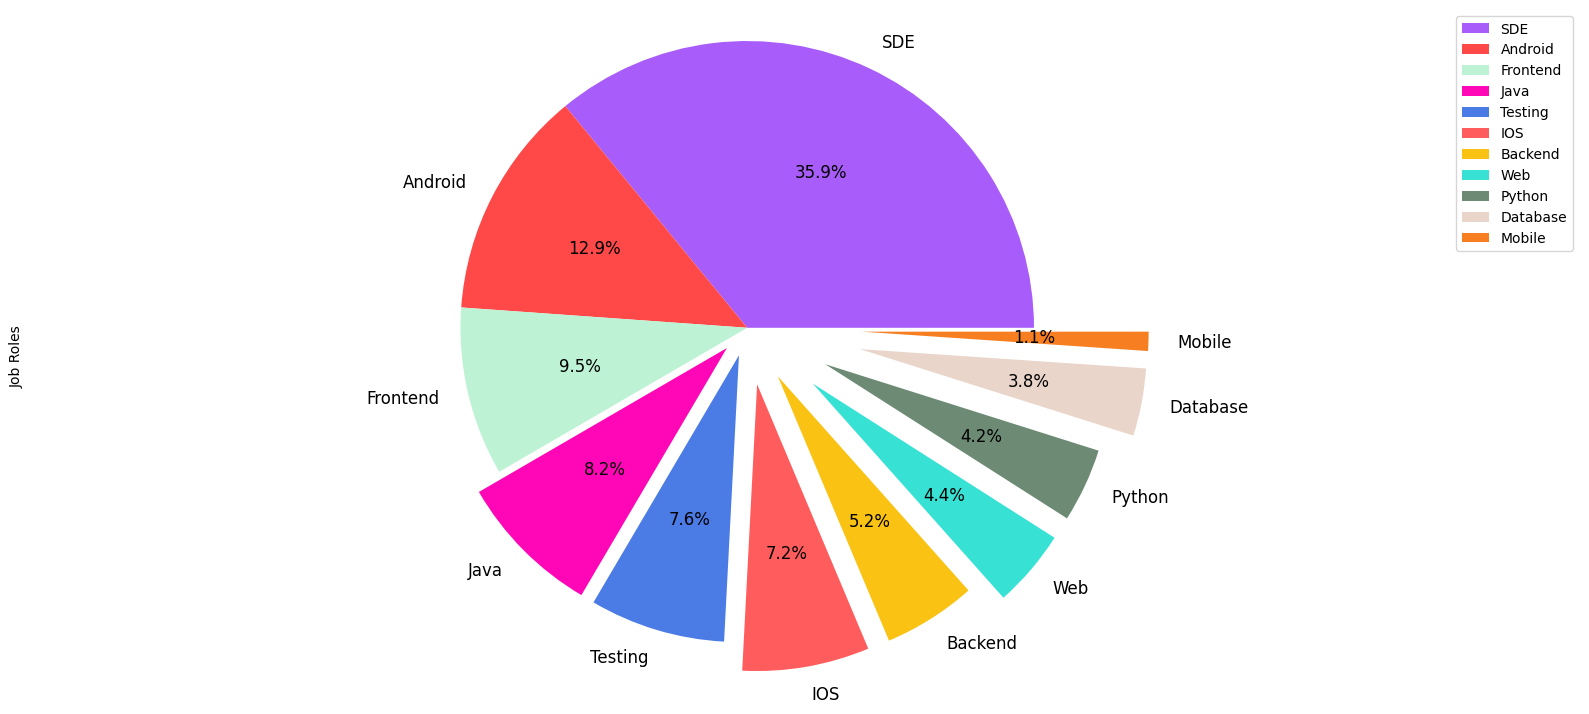

In [ ]:
#Pie Chart on Job roles
plt.figure(figsize = (20, 9))

counts = df["Job Roles"].value_counts()
explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4)
colors = ['#A85CF9', '#FF4949', '#BDF2D5', '#FF06B7', '#4B7BE5', '#FF5D5D', '#FAC213', '#37E2D5', '#6D8B74', '#E9D5CA', '#F77E21']

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [ ]:
#Prepare the data for Training
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset and drop the "Salary" column from the input features
X = df.drop("Salary",axis =1)

# Create a separate dataframe for the "Salary" column and apply MinMaxScaler to it
y = pd.DataFrame(df['Salary'])
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
#print (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=72)

[[0.00442108]
 [0.00442108]
 [0.0110879 ]
 ...
 [0.00210992]
 [0.00330994]
 [0.00330994]]


In [ ]:
print(f'Rows of train: {X_train.shape[0]}, Rows of test: {X_test.shape[0]}')

Rows of train: 15255, Rows of test: 7515


In [ ]:
#Feature selection and encoding categorical variables
# Feature selection
print(X_train)



In [ ]:
X_train = X_train[['Rating', 'Company Name', 'Job Title','Location', 'Employment Status', 'Job Roles']]
X_test = X_test[['Rating', 'Company Name', 'Job Title','Location', 'Employment Status', 'Job Roles']]

In [ ]:
# one-hot encoding
labels_to_encode = ['Company Name', 'Job Title', 'Location','Employment Status', 'Job Roles']
for label in labels_to_encode:
    X_train = X_train.join(pd.get_dummies(X_train[label], prefix = label))
    X_train.drop(label, axis=1, inplace=True)

for label in labels_to_encode:
    X_test = X_test.join(pd.get_dummies(X_test[label], prefix = label))
    X_test.drop(label, axis=1, inplace=True)

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
# R squared score
score =reg.score(X_train, y_train)
print(' Train R-squared:', score)

 Train R-squared: 0.8842750503509913


In [ ]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = model.score(X_test, y_test)